<a href="https://colab.research.google.com/github/chandan7464/Prodigy-Ml-02/blob/main/Copy_of_Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# New Section

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
display("duplicated:",df.duplicated().sum())

'duplicated:'

0

In [ ]:
X= df.iloc[:, [3,4]].values

In [ ]:
X= df.iloc[:, [3,4]].values

In [ ]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
#Ignore the above warnings


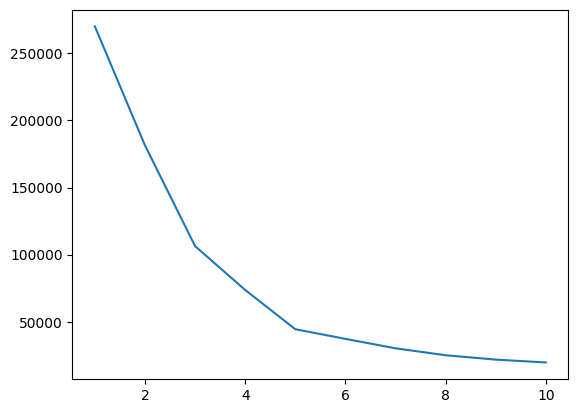

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [ ]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


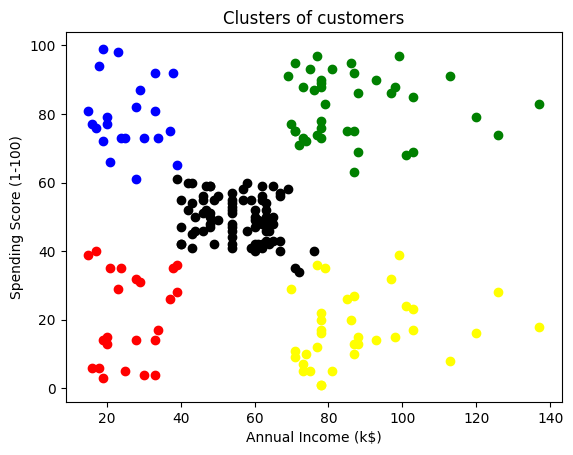

In [ ]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
df["Target"]=y_means

In [ ]:
Clustered_df=df
Clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1


In [ ]:
X=Clustered_df.iloc[:,1:5]
y=Clustered_df.iloc[:,-1]

In [ ]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
le=LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [ ]:
le=LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
gbdt.fit(X_train,y_train)
y_pred=gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.975

In [ ]:
y_pred=gbdt.predict(X_test)
y_pred


array([4, 0, 1, 3, 3, 4, 4, 3, 3, 4, 4, 3, 2, 4, 3, 2, 4, 3, 4, 4, 3, 1,
       3, 4, 4, 4, 4, 4, 2, 4, 0, 1, 4, 4, 3, 4, 2, 2, 3, 4], dtype=int32)

In [ ]:
prediction = pd.DataFrame({'Original Value': y_test, 'Predicted Value': y_pred})

# Print the DataFrame
display(prediction)

,Original Value,Predicted Value
95,4,4
15,0,0
30,1,1
158,3,3
128,3,3
115,4,4
69,4,4
170,3,3
174,3,3
45,0,4
